#  🚒🚒Predicting the scale price of Bulldozers using Machine Learning Model

* In this notebook, we are going to go through an example of machine learning project with the goal of predicting the scale price of bulldozers.
### 1. Problem Definition
* How well can we predict the future sale price of bulldozer, given its characteristics & previous examples of how much similar bulldozer have sold for?
### 2. Data 
* The data is downloaded from the Kaggle Blue book for Bulldozer competition.
##### https://www.kaggle.com/competitions/bluebook-for-bulldozers/data
* There are 3 main Types of data:
    * Train.csv is the training set, which contains data through the end of 2011.
    * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
    * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition
### 3. Evaluation 
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
##### https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview
* The goal of most regression evaluation metrics is to minimize the error.
### 4. Features 
Kaggle provides a data dictionary detailing all the feature of the dataset.
     


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Exploring our data 

In [2]:
# Import the training and validation datasets
df=pd.read_csv("./data/data/TrainAndValid.csv",low_memory=False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
# checking for missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

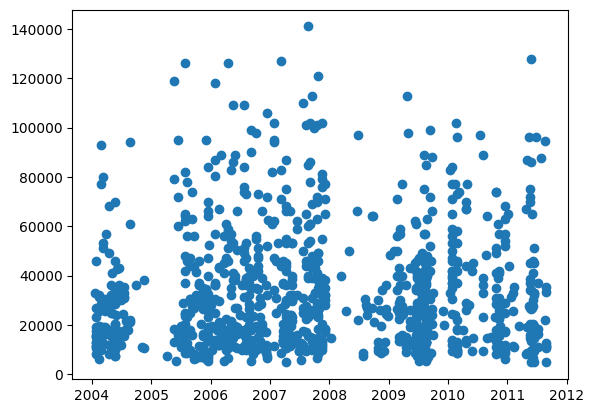

In [5]:
## visualeze our data
df["saledate"] = pd.to_datetime(df["saledate"]) # converting saledate to datetime
fig, ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]); # ploting one of the most important features


In [6]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### sort dataFrame by saledate -good for time for time series problems

In [7]:
# sort Data Frame by saledate
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(5)
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make copy of the original DataFrame
we make copy of the original dataframe so when we manipulate the copy , we have got our original one

In [8]:
# make copy of the original DataFrame
df_tmp=df.copy()

## Feature engneering

In [9]:
# Add datetime parameters for saledate column
df_tmp["saleYear"]=df_tmp["saledate"].dt.year
df_tmp["saleMonth"]=df_tmp["saledate"].dt.month
df_tmp["saleDay"]=df_tmp["saledate"].dt.day
df_tmp["saleofWeek"]=df_tmp["saledate"].dt.dayofweek
df_tmp["saleofYear"]=df_tmp["saledate"].dt.dayofyear 
df_tmp.drop("saledate",axis=1, inplace=True)
df_tmp.head(5).T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [10]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

### convert string to catagories 
one way we can all fill our data into numbers is by cnverting them into pandas catagories

In [11]:
# Find the column which contains strings 
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [13]:
df_tmp.Drive_System.tail(5)

410879    NaN
412476    NaN
411927    NaN
407124     No
409203    NaN
Name: Drive_System, dtype: object

### Fill missing Values
#### Fill numerical missing values first:

In [14]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if(pd.isnull(content)).sum():
            # fill th numeric rows with median
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [15]:
# check if there is there is any numerical null values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if(pd.isnull(content)).sum():
            print(label)
        else:
            print("There is no numeric column with missing values")

There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values
There is no numeric column with missing values


#### Filling and Turning Catagorical Variables into Numbers 

In [16]:
# fill columns which are not nummeric
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

In [17]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [18]:
# split data in to train and validation
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]
len(df_val),len(df_train)
# split data in to X and Y
X_train,Y_train=df_train.drop("SalePrice", axis=1),df_train["SalePrice"]
X_test,Y_test=df_val.drop("SalePrice", axis=1),df_val["SalePrice"]


### Modelling

In [19]:
# import model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
# create our own evaluation function
def rmsle(y_test,y_preds):
    """
    Calculate root mean squared log error between predicrions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))
# create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_test)
    scores={"Training MAE":mean_absolute_error(Y_train,train_preds),
            "Valid MAE":mean_absolute_error(Y_test,val_preds),
            "Training RMSLE":rmsle(Y_train,train_preds),
            "Valid RMSLE" :rmsle(Y_test,val_preds)}
    return scores
# instantiate model
model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)
# fit the model
model.fit(X_train,Y_train)
# check the scores of the model
show_scores(model)

{'Training MAE': 5561.298809224058,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': np.float64(0.25774537825697696),
 'Valid RMSLE': np.float64(0.29362638671089003)}

### HyperParameters Tunning With RandomizedSearchCV

In [21]:
# Different RandomForestRegressor Parameters
rf_grid={
    "n_estimators":np.arange(10,100,10),
    "max_depth":[None,10,20],
    "min_samples_split":[2,4,6],
    "max_features":["auto","sqrt","log2"],
    "max_samples":[10000]
}

# instantiate RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2)
# fit the model
rs_model.fit(X_train,Y_train)
# evaluate the model
show_scores(rs_model)

c:\Users\UserK\Desktop\MIlestone-project2\Bulldozer-price-prediction-project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\UserK\Desktop\MIlestone-project2\Bulldozer-price-prediction-project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\UserK\Desktop\MIlestone-project2\Bulldozer-price-prediction-project\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\

{'Training MAE': 7420.040348975874,
 'Valid MAE': 9278.896565777433,
 'Training RMSLE': np.float64(0.33061705569428923),
 'Valid RMSLE': np.float64(0.37775935915139114)}

In [22]:
# most ideal Hyperparameters(gainde from RandomizedSearchCV after 100 iterations)
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_samples=0.5,
                                  n_jobs=-1,
                                  random_state=42)
# fit the ideal model
ideal_model.fit(X_train,Y_train)
# evaluate the ideal model
show_scores(ideal_model)


{'Training MAE': 3510.7200955853896,
 'Valid MAE': 6113.726087826331,
 'Training RMSLE': np.float64(0.1702939871996806),
 'Valid RMSLE': np.float64(0.25313593282022284)}